In [1]:
#Importing
#Importing the libraries that will be used
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os
from PIL import Image
from IPython.display import display
from torch.utils.data import random_split


In [12]:

transform = transforms.Compose([transforms.Resize((150,150)),transforms.ToTensor()])


In [21]:
class CNN(nn.Module):
  def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1, stride=1)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1, stride=1)
        self.conv3 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1, stride=1)
        self.conv4 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1, stride=1)

        self.pool = nn.MaxPool2d(kernel_size=2)

        self.fc1 = nn.Linear(in_features=512 * 9 * 9, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=6)

        self.dropout = nn.Dropout(0.25)

  def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))

        x = x.view(x.size(0), -1)

        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [22]:
model = CNN()

In [24]:
model.load_state_dict(torch.load("./image_model_CNN.pt"))
model.eval()

CNN(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=41472, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=6, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)

In [100]:
classes = ['buildings','sea', 'glacier', 'street', 'mountain',  'street', 'forest']

In [25]:
# test

In [65]:
im = Image.open("samples/20079.jpg")  


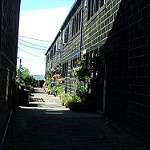

In [66]:
im

In [67]:
i = transform(im)

In [68]:
i.shape

torch.Size([3, 150, 150])

In [69]:
input = torch.unsqueeze(input, 0)

In [70]:
input.shape

torch.Size([1, 3, 150, 150])

In [71]:
outputs = model(input)

In [72]:
outputs

tensor([[ 4.2071,  0.5455, -2.5158, -3.9321, -5.0279,  6.1891]],
       grad_fn=<AddmmBackward0>)

In [73]:
_, predicted = torch.max(outputs, 1)

In [74]:
predicted

tensor([5])

In [82]:
predicted[0]

tensor(5)

In [101]:
i = predicted[0].item()

In [102]:
classes[i]

'street'

In [50]:
#put all in fun


In [60]:
def predict(path):
    img = Image.open(path)  
    i = transform(img)
    input = torch.unsqueeze(i, 0)
    outputs = model(input)
    _, predicted = torch.max(outputs, 1)
    i = predicted[0].item()
    print(classes[i])

    

In [103]:
predict('samples/20083.jpg')

buildings


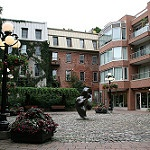

In [91]:
img = Image.open('samples/20083.jpg')
img

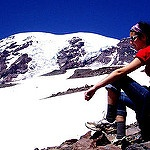

In [92]:
img = Image.open('samples/20116.jpg')
img

In [104]:
predict('samples/20116.jpg')

glacier
